# Limpieza de Datos, EDA e Hipótesis

## Equipo 5

## Tabla iar_Reservaciones.csv

### Leer df y seleccionar columnas útiles

In [ ]:
import pandas as pd

# Leer la primera tabla: Reservaciones
df_reservas = pd.read_csv("iar_Reservaciones.csv")

# Variables útiles de la tabla de Reservaciones
columnas_reservas_utiles = [
    "ID_Reserva", "Fecha_hoy", "h_num_per", "h_num_adu", "h_num_men",
    "h_num_noc", "h_tot_hab", "ID_Programa", "ID_empresa", "ID_Paquete", "ID_Segmento_Comp",
    "ID_Agencia", "ID_Tipo_Habitacion", "ID_canal", "h_fec_lld", "h_fec_reg",
    "h_fec_sda", "ID_Pais_Origen", "Reservacion", "ID_estatus_reservaciones",
    "h_edo", "h_tfa_total", "moneda_cve", "h_ult_cam_fec"
]

# Subconjunto con las columnas necesarias
df_reservas_sub = df_reservas[columnas_reservas_utiles].copy()

# Verificar columnas faltantes
for col in columnas_reservas_utiles:
    if col not in df_reservas.columns:
        print(f"❌ No se encontró la columna en reservas: {col}")

# Guardar el resultado en un nuevo CSV
df_reservas_sub.to_csv("iar_Reservaciones_filtrado.csv", index=False)

# Verificar las primeras filas del nuevo DataFrame
print(df_reservas_sub.head())

<ipython-input-1-0c0568e475da>:4: DtypeWarning: Columns (22,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reservas = pd.read_csv("iar_Reservaciones.csv")


   ID_Reserva   Fecha_hoy  h_num_per  h_num_adu  h_num_men  h_num_noc  \
0           0  2019-08-16          2          2          0          3   
1           1  2019-10-22          4          4          0          4   
2           2  2019-10-28          2          2          0          4   
3           3  2019-10-28          4          3          0          3   
4           4  2019-10-28          2          2          0          4   

   h_tot_hab  ID_Programa  ID_empresa  ID_Paquete  ...  h_fec_lld  h_fec_reg  \
0          1            1           1           1  ...   20191107   20190816   
1          1            1           1           2  ...   20191201   20191022   
2          1            1           1           1  ...   20191201   20191028   
3          1            1           1           2  ...   20191208   20191028   
4          1            1           1           1  ...   20191208   20191208   

   h_fec_sda  ID_Pais_Origen Reservacion ID_estatus_reservaciones   h_edo  \
0  

### Verificación y corrección de tipos de datos de las columnas

In [ ]:
# Verificar los tipos de datos actuales en el DataFrame
print("Tipos de datos actuales en el DataFrame de Reservaciones:")
print(df_reservas_sub.dtypes)

# Corrección de tipos de datos
# Convertir columnas de fechas a datetime
df_reservas_sub['Fecha_hoy'] = pd.to_datetime(df_reservas_sub['Fecha_hoy'], errors='coerce')  # Convertir a datetime
df_reservas_sub['h_fec_lld'] = pd.to_datetime(df_reservas_sub['h_fec_lld'], errors='coerce')  # Convertir a datetime
df_reservas_sub['h_fec_reg'] = pd.to_datetime(df_reservas_sub['h_fec_reg'], errors='coerce')  # Convertir a datetime
df_reservas_sub['h_fec_sda'] = pd.to_datetime(df_reservas_sub['h_fec_sda'], errors='coerce')  # Convertir a datetime

# Convertir columnas numéricas a tipos adecuados
df_reservas_sub['h_tot_hab'] = df_reservas_sub['h_tot_hab'].astype(int)  # Convertir a entero (cantidad de habitaciones)
df_reservas_sub['h_num_per'] = df_reservas_sub['h_num_per'].astype(int)  # Convertir a entero (número de personas)
df_reservas_sub['h_num_adu'] = df_reservas_sub['h_num_adu'].astype(int)  # Convertir a entero (número de adultos)
df_reservas_sub['h_num_men'] = df_reservas_sub['h_num_men'].astype(int)  # Convertir a entero (número de menores)
df_reservas_sub['h_num_noc'] = df_reservas_sub['h_num_noc'].astype(int)  # Convertir a entero (número de noches)

# Convertir columnas de texto a string (si es necesario)
df_reservas_sub['ID_Programa'] = df_reservas_sub['ID_Programa'].astype(str)  # Convertir a string
df_reservas_sub['ID_empresa'] = df_reservas_sub['ID_empresa'].astype(str)  # Convertir a string
df_reservas_sub['ID_Paquete'] = df_reservas_sub['ID_Paquete'].astype(str)  # Convertir a string
df_reservas_sub['ID_Segmento_Comp'] = df_reservas_sub['ID_Segmento_Comp'].astype(str)  # Convertir a string
df_reservas_sub['ID_Agencia'] = df_reservas_sub['ID_Agencia'].astype(str)  # Convertir a string
df_reservas_sub['ID_Tipo_Habitacion'] = df_reservas_sub['ID_Tipo_Habitacion'].astype(str)  # Convertir a string
df_reservas_sub['ID_canal'] = df_reservas_sub['ID_canal'].astype(str)  # Convertir a string
df_reservas_sub['ID_Pais_Origen'] = df_reservas_sub['ID_Pais_Origen'].astype(str)  # Convertir a string
df_reservas_sub['moneda_cve'] = df_reservas_sub['moneda_cve'].astype(str)  # Convertir a string

# Verificar los tipos de datos después de la corrección
print("\nTipos de datos después de la corrección:")
print(df_reservas_sub.dtypes)

# Guardar el DataFrame corregido en un nuevo archivo CSV
df_reservas_sub.to_csv("iar_Reservaciones_filtrado_corregido.csv", index=False)

# Verificar las primeras filas del nuevo DataFrame corregido
print("\nPrimeras filas del DataFrame corregido:")
print(df_reservas_sub.head())

Tipos de datos actuales en el DataFrame de Reservaciones:
ID_Reserva                    int64
Fecha_hoy                    object
h_num_per                     int64
h_num_adu                     int64
h_num_men                     int64
h_num_noc                     int64
h_tot_hab                     int64
ID_Programa                   int64
ID_empresa                    int64
ID_Paquete                    int64
ID_Segmento_Comp              int64
ID_Agencia                    int64
ID_Tipo_Habitacion            int64
ID_canal                      int64
h_fec_lld                    object
h_fec_reg                    object
h_fec_sda                    object
ID_Pais_Origen                int64
Reservacion                   int64
ID_estatus_reservaciones      int64
h_edo                        object
h_tfa_total                 float64
moneda_cve                  float64
h_ult_cam_fec                object
dtype: object

Tipos de datos después de la corrección:
ID_Reserva            

## Pasos de la limpieza (Trazabilidad y Linaje)

### 1. Eliminar registros con número de personas = 0

In [ ]:
# Ver cuántos registros tienen h_num_per <= 0
registros_invalidos = df_reservas_sub[df_reservas_sub["h_num_per"] == 0]
print(f"Registros con h_num_per = 0: {len(registros_invalidos)}")

# Eliminar esos registros del DataFrame
df_reservas_sub = df_reservas_sub[df_reservas_sub["h_num_per"] > 0]

Registros con h_num_per = 0: 73507


### 2. Eliminar registros con número de noches = 0

In [ ]:
noc_cero = df_reservas_sub[df_reservas_sub['h_num_noc'] == 0]
print(f"Registros con h_num_noc == 0: {len(noc_cero)}")

df_reservas_sub = df_reservas_sub[df_reservas_sub['h_num_noc'] != 0]

Registros con h_num_noc == 0: 203


### 3. Eliminar registros con número de habitaciones = 0

In [ ]:
hab_cero = df_reservas_sub[df_reservas_sub['h_tot_hab'] == 0]
print(f"Registros con h_tot_hab == 0: {len(hab_cero)}")

df_reservas_sub = df_reservas_sub[df_reservas_sub['h_tot_hab'] != 0]

Registros con h_tot_hab == 0: 246


### *** Eliminar registros con tarifa total <=/= 0


In [ ]:
# Filtrar y contar registros con h_tfa_total menor a 0
registros_negativos = df_reservas_sub[df_reservas_sub['h_tfa_total'] < 0]
cantidad = len(registros_negativos)

print(f"Cantidad de registros con h_tfa_total < 0: {cantidad}")


# Esta línea es la que limpia el df
# Dice quedarse sólo con los valores >= 0 de tarifa total.
#df_reservas_sub = df_reservas_sub[df_reservas_sub['h_tfa_total'] >= 0]

Cantidad de registros con h_tfa_total < 0: 32


### 4.1. Exploración de de valores más extremos con método IQR y Estadísticas Descriptivas

In [ ]:
# Variables continuas a revisar
columnas_continuas = ["h_num_per", "h_num_adu", "h_num_men", "h_num_noc", "h_tot_hab", "h_tfa_total"]

In [ ]:
print(df_reservas_sub[columnas_continuas].describe().T)

                count         mean          std      min      25%     50%  \
h_num_per    101750.0     2.356590     0.986174      1.0     2.00     2.0   
h_num_adu    101750.0     2.174988     0.739705      1.0     2.00     2.0   
h_num_men    101750.0     0.067941     0.371245      0.0     0.00     0.0   
h_num_noc    101750.0     3.347007     3.287655      1.0     2.00     3.0   
h_tot_hab    101750.0     1.006693     0.104562      1.0     1.00     1.0   
h_tfa_total  101750.0  8170.393791  6355.104574 -30910.0  4860.96  7560.0   

                 75%       max  
h_num_per        2.0      32.0  
h_num_adu        2.0      15.0  
h_num_men        0.0      15.0  
h_num_noc        4.0     687.0  
h_tot_hab        1.0       6.0  
h_tfa_total  10740.0  655848.0  


#### Boxplot de columnas numéricas antes de limpieza de datos atípicos

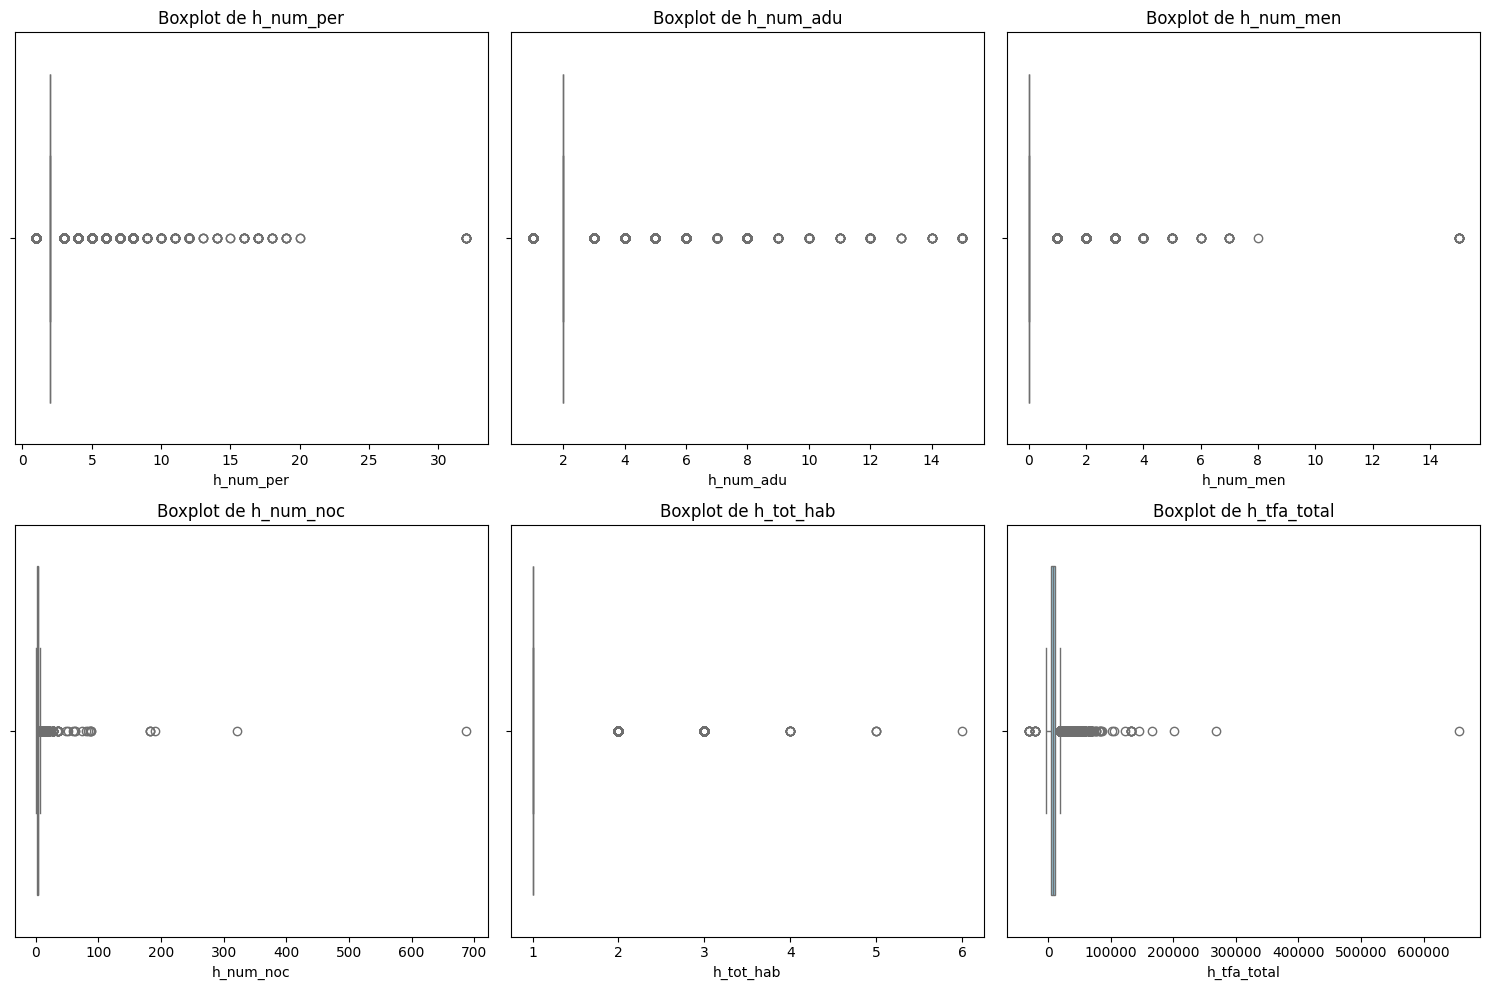

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables continuas
columnas_continuas = ["h_num_per", "h_num_adu", "h_num_men", "h_num_noc", "h_tot_hab", "h_tfa_total"]

# Crear figura con subplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_continuas):
    plt.subplot(2, 3, i + 1)  # 2 filas, 3 columnas de gráficos
    sns.boxplot(x=df_reservas_sub[col], color='skyblue')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

#### Limpieza de datos atípicos para las variables "h_num_per", "h_num_noc", "h_tfa_total"

In [ ]:
print(f"Registros antes de eliminar datos atípicos: {df_reservas_sub.shape[0]}")

Registros antes de eliminar datos atípicos: 101750


In [ ]:
columnas_a_limpiar = ["h_num_per", "h_num_noc", "h_tfa_total"]

df_limpio_extremo = df_reservas_sub.copy()

for col in columnas_a_limpiar:
    low = df_limpio_extremo[col].quantile(0.0005)   # percentil 0.05%
    high = df_limpio_extremo[col].quantile(0.9995)  # percentil 99.95%

    df_limpio_extremo = df_limpio_extremo[(df_limpio_extremo[col] >= low) & (df_limpio_extremo[col] <= high)]

print(f"Registros después de eliminar solo el 0.1% más extremo en {columnas_a_limpiar}: {len(df_limpio_extremo)}")


Registros después de eliminar solo el 0.1% más extremo en ['h_num_per', 'h_num_noc', 'h_tfa_total']: 101581


In [ ]:
# Para ver la limpieza de datos atípicos
df_reservas_sub_atipicos = df_limpio_extremo

#### Boxplot de columnas numéricas después de limpieza de datos atípicos

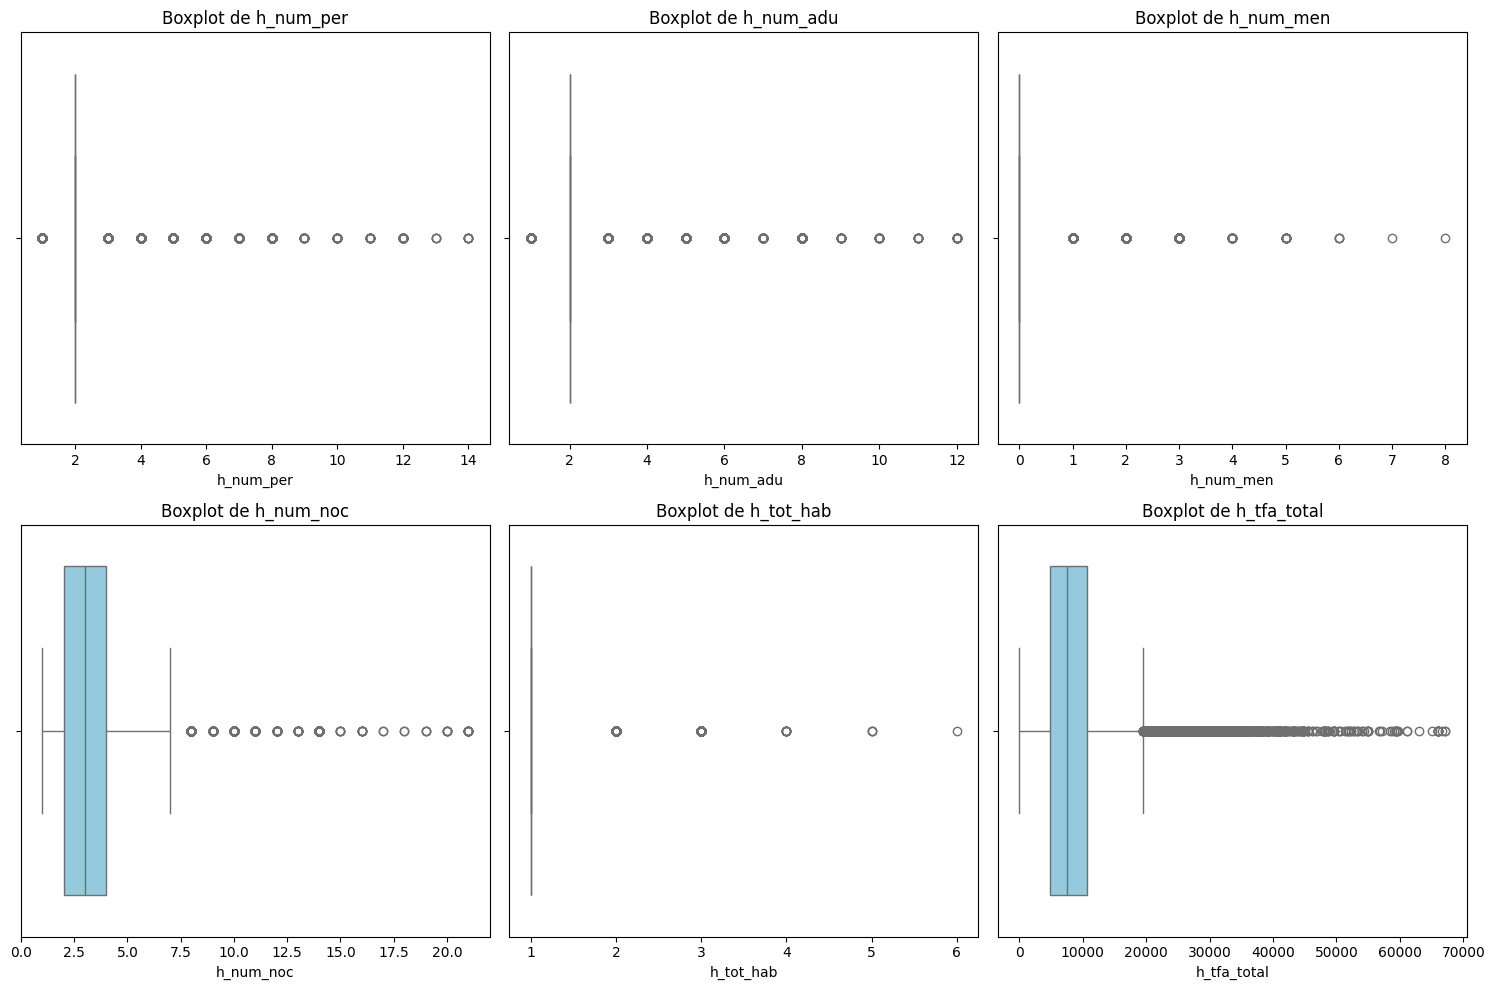

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Lista de variables continuas
columnas_continuas = ["h_num_per", "h_num_adu", "h_num_men", "h_num_noc", "h_tot_hab", "h_tfa_total"]

# Crear figura con subplots
plt.figure(figsize=(15, 10))

for i, col in enumerate(columnas_continuas):
    plt.subplot(2, 3, i + 1)  # 2 filas, 3 columnas de gráficos
    sns.boxplot(x=df_reservas_sub_atipicos[col], color='skyblue')
    plt.title(f"Boxplot de {col}")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
# Para confirmar limpieza
df_reservas_sub = df_reservas_sub_atipicos

#### Mariz de Correlación de las variables

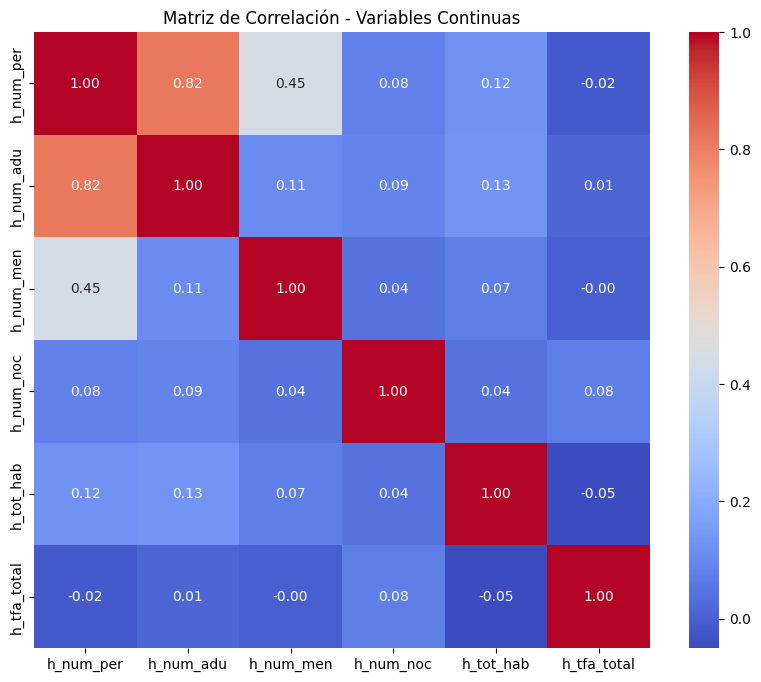

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación
correlacion = df_reservas_sub[columnas_continuas].corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Matriz de Correlación - Variables Continuas")
plt.show()

In [ ]:
# Calcular y mostrar la matriz de correlación en consola
correlacion_texto = df_reservas_sub[columnas_continuas].corr()
print("Matriz de correlación:\n")
print(correlacion_texto.round(2))

Matriz de correlación:

             h_num_per  h_num_adu  h_num_men  h_num_noc  h_tot_hab  \
h_num_per         1.00       0.82       0.45       0.08       0.12   
h_num_adu         0.82       1.00       0.11       0.09       0.13   
h_num_men         0.45       0.11       1.00       0.04       0.07   
h_num_noc         0.08       0.09       0.04       1.00       0.04   
h_tot_hab         0.12       0.13       0.07       0.04       1.00   
h_tfa_total      -0.02       0.01      -0.00       0.08      -0.05   

             h_tfa_total  
h_num_per          -0.02  
h_num_adu           0.01  
h_num_men          -0.00  
h_num_noc           0.08  
h_tot_hab          -0.05  
h_tfa_total         1.00  


### 4.2. Eliminación Manual de datos atípicos (No es global y es específica a este df) Entonces no va en el pipeline

#### Persona con reserva de 687 noches y 0 tarifa total

In [ ]:
registro_especifico = df_reservas_sub[df_reservas_sub['h_num_noc'] == 687.0]
print(registro_especifico)

Empty DataFrame
Columns: [ID_Reserva, Fecha_hoy, h_num_per, h_num_adu, h_num_men, h_num_noc, h_tot_hab, ID_Programa, ID_empresa, ID_Paquete, ID_Segmento_Comp, ID_Agencia, ID_Tipo_Habitacion, ID_canal, h_fec_lld, h_fec_reg, h_fec_sda, ID_Pais_Origen, Reservacion, ID_estatus_reservaciones, h_edo, h_tfa_total, moneda_cve, h_ult_cam_fec]
Index: []

[0 rows x 24 columns]


In [ ]:
# Eliminación de ese dato atípico
df_reservas_sub = df_reservas_sub[df_reservas_sub['h_num_noc'] != 687.0]

#### Reservas con 32 personas y repetición de este suceso

In [ ]:
cantidad_32 = (df_reservas_sub['h_num_per'] == 32).sum()
print(f"Cantidad de registros con h_num_per = 32: {cantidad_32}")

Cantidad de registros con h_num_per = 32: 0


In [ ]:
import pandas as pd

registros_32_personas = df_reservas_sub[df_reservas_sub['h_num_per'] == 32]

# Mostrar todas las columnas sin truncarlas
pd.set_option('display.max_columns', None)

# Mostrar el DataFrame completo
print(registros_32_personas)

Empty DataFrame
Columns: [ID_Reserva, Fecha_hoy, h_num_per, h_num_adu, h_num_men, h_num_noc, h_tot_hab, ID_Programa, ID_empresa, ID_Paquete, ID_Segmento_Comp, ID_Agencia, ID_Tipo_Habitacion, ID_canal, h_fec_lld, h_fec_reg, h_fec_sda, ID_Pais_Origen, Reservacion, ID_estatus_reservaciones, h_edo, h_tfa_total, moneda_cve, h_ult_cam_fec]
Index: []


In [ ]:
# Eliminación de reservas con 32 personas
df_reservas_sub = df_reservas_sub[df_reservas_sub['h_num_per'] != 32]

#### Tarifa Total de $655,848 en reserva

In [ ]:
registro_tarifa_extrema = df_reservas_sub[df_reservas_sub["h_tfa_total"] == 655848.0]
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
print(registro_tarifa_extrema)

Empty DataFrame
Columns: [ID_Reserva, Fecha_hoy, h_num_per, h_num_adu, h_num_men, h_num_noc, h_tot_hab, ID_Programa, ID_empresa, ID_Paquete, ID_Segmento_Comp, ID_Agencia, ID_Tipo_Habitacion, ID_canal, h_fec_lld, h_fec_reg, h_fec_sda, ID_Pais_Origen, Reservacion, ID_estatus_reservaciones, h_edo, h_tfa_total, moneda_cve, h_ult_cam_fec]
Index: []


In [ ]:
# Eliminación de tarifa total de $655,848
df_reservas_sub = df_reservas_sub[df_reservas_sub["h_tfa_total"] != 655848.0]

#### Tarifa Total de $268,632 en reserva

In [ ]:
registro_tarifa_268k = df_reservas_sub[df_reservas_sub["h_tfa_total"] == 268632.0]
pd.set_option('display.max_columns', None)  # Asegura que se vean todas las columnas
print(registro_tarifa_268k)

Empty DataFrame
Columns: [ID_Reserva, Fecha_hoy, h_num_per, h_num_adu, h_num_men, h_num_noc, h_tot_hab, ID_Programa, ID_empresa, ID_Paquete, ID_Segmento_Comp, ID_Agencia, ID_Tipo_Habitacion, ID_canal, h_fec_lld, h_fec_reg, h_fec_sda, ID_Pais_Origen, Reservacion, ID_estatus_reservaciones, h_edo, h_tfa_total, moneda_cve, h_ult_cam_fec]
Index: []


In [ ]:
# Eliminación de tarifa total de $268632
df_reservas_sub = df_reservas_sub[df_reservas_sub["h_tfa_total"] != 268632.0]

### Revisión de número de filas después de la limpieza

In [ ]:
import pandas as pd

# Mostrar forma del DataFrame (filas, columnas)
print(f"Filas: {df_reservas_sub.shape[0]}")
print(f"Columnas: {df_reservas_sub.shape[1]}")

Filas: 101581
Columnas: 24


### Guardar df

In [ ]:
df_limpio = df_reservas_sub

# Guardar resultados
df_limpio.to_csv("Reservaciones_df_limpio.csv", index = False)

In [ ]:
# Ver estadísticas finales
print(f"\n📊 Número de filas después de limpieza completa: {len(df_limpio)}\n\n")
print(df_limpio[columnas_continuas].describe())


📊 Número de filas después de limpieza completa: 101581


           h_num_per      h_num_adu      h_num_men      h_num_noc  \
count  101581.000000  101581.000000  101581.000000  101581.000000   
mean        2.348628       2.170071       0.064943       3.310403   
std         0.898456       0.697236       0.330187       1.768024   
min         1.000000       1.000000       0.000000       1.000000   
25%         2.000000       2.000000       0.000000       2.000000   
50%         2.000000       2.000000       0.000000       3.000000   
75%         2.000000       2.000000       0.000000       4.000000   
max        14.000000      12.000000       8.000000      21.000000   

           h_tot_hab    h_tfa_total  
count  101581.000000  101581.000000  
mean        1.006566    8126.833800  
std         0.103712    5619.829567  
min         1.000000       0.000000  
25%         1.000000    4876.000000  
50%         1.000000    7560.000000  
75%         1.000000   10740.000000  
max         6.00

## Hipótesis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [ ]:
df = pd.read_csv("Reservaciones_df_limpio.csv")

### 🏨 1. Correlación entre habitaciones y personas (Pearson y Spearman)


In [ ]:
# Correlación de Pearson
pearson_corr, p_pearson = stats.pearsonr(df['h_tot_hab'], df['h_num_per'])

# Correlación de Spearman
spearman_corr, p_spearman = stats.spearmanr(df['h_tot_hab'], df['h_num_per'])

print(f"Pearson: Correlación = {pearson_corr:.3f}, p-valor = {p_pearson:.3f}")
print(f"Spearman: Correlación = {spearman_corr:.3f}, p-valor = {p_spearman:.3f}")

Pearson: Correlación = 0.124, p-valor = 0.000
Spearman: Correlación = 0.059, p-valor = 0.000


#### Visualización de las correlaciones

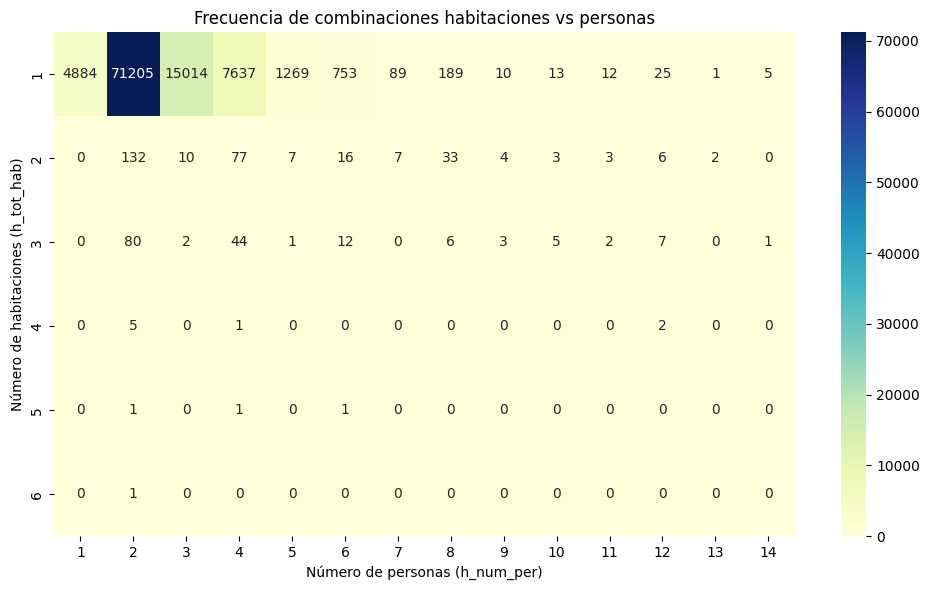

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Crear tabla de frecuencias cruzadas
tabla = pd.crosstab(df['h_tot_hab'], df['h_num_per'])

plt.figure(figsize=(10, 6))
sns.heatmap(tabla, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Frecuencia de combinaciones habitaciones vs personas')
plt.xlabel('Número de personas (h_num_per)')
plt.ylabel('Número de habitaciones (h_tot_hab)')
plt.tight_layout()
plt.show()

### 🛏️ 2. ANOVA: Tipo de habitación vs tarifa total

In [ ]:
# Eliminar NaNs si hay
df_anova = df[['ID_Tipo_Habitacion', 'h_tfa_total']].dropna()

# ANOVA de una vía
modelo = ols('h_tfa_total ~ C(ID_Tipo_Habitacion)', data=df_anova).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)

print(anova_resultado)

                             sum_sq        df           F  PR(>F)
C(ID_Tipo_Habitacion)  3.205523e+11      27.0  417.533604     0.0
Residual               2.887596e+12  101553.0         NaN     NaN


#### Visualización Tipo de Habitación y su Boxplot de Tarifa Total

<ipython-input-36-7337dc31eef7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ID_Tipo_Habitacion', y='h_tfa_total', palette='Set3', showfliers=False)


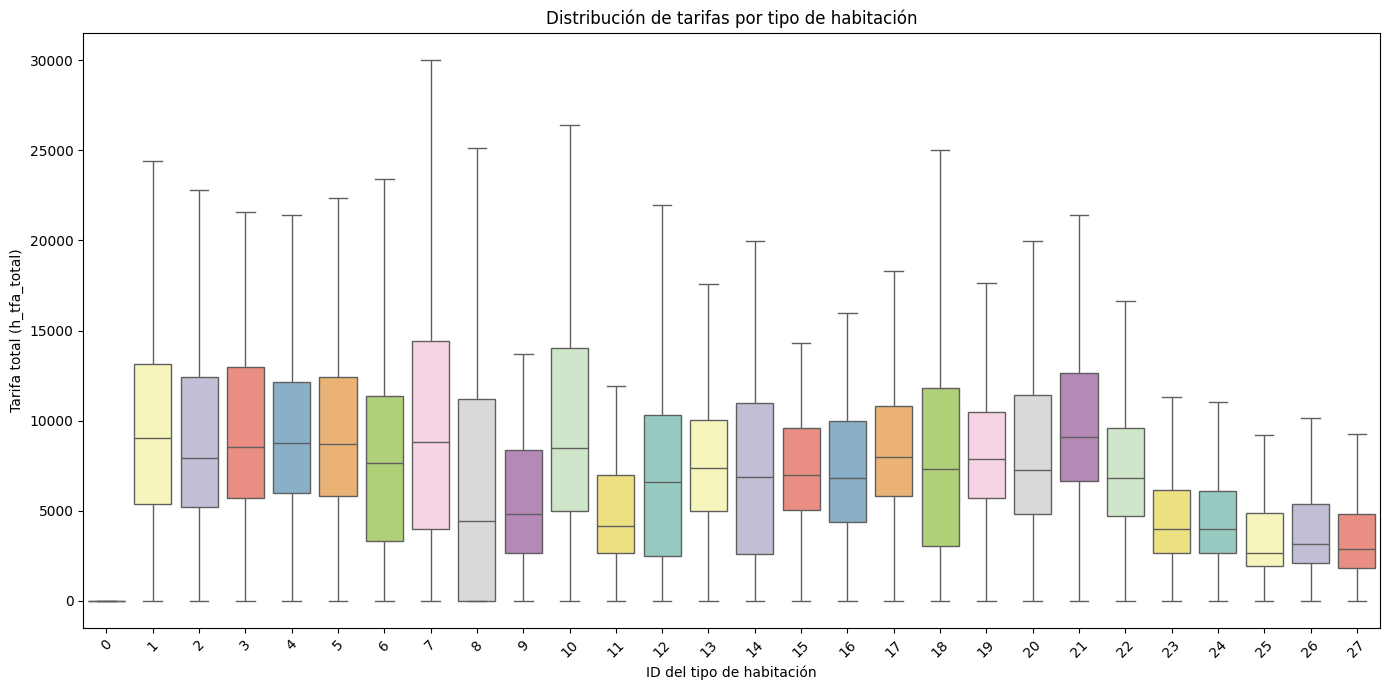

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='ID_Tipo_Habitacion', y='h_tfa_total', palette='Set3', showfliers=False)
plt.title('Distribución de tarifas por tipo de habitación')
plt.xlabel('ID del tipo de habitación')
plt.ylabel('Tarifa total (h_tfa_total)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🌐 3. ANOVA: Canal vs duración de la estancia


In [ ]:
df_anova = df[['ID_canal', 'h_num_noc']].dropna()
modelo = ols('h_num_noc ~ C(ID_canal)', data=df_anova).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)

print(anova_resultado)

                    sum_sq        df            F  PR(>F)
C(ID_canal)   43628.444568      13.0  1244.471581     0.0
Residual     273901.253072  101567.0          NaN     NaN


#### Visualizar el canal de distribución respecto el promedio de número de noches reservadas

    ID_canal  Promedio_num_noc
8          8              5.56
10        10              4.81
11        11              4.40
12        12              4.00
3          3              3.66
0          0              3.51
1          1              3.48
13        13              3.32
7          7              3.17
2          2              3.07
5          5              2.76
4          4              2.73
9          9              2.70
6          6              2.03


<ipython-input-38-ded470b5e8e6>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=promedio_noc_x_canal, x='Promedio_num_noc', y='ID_canal', palette='viridis')


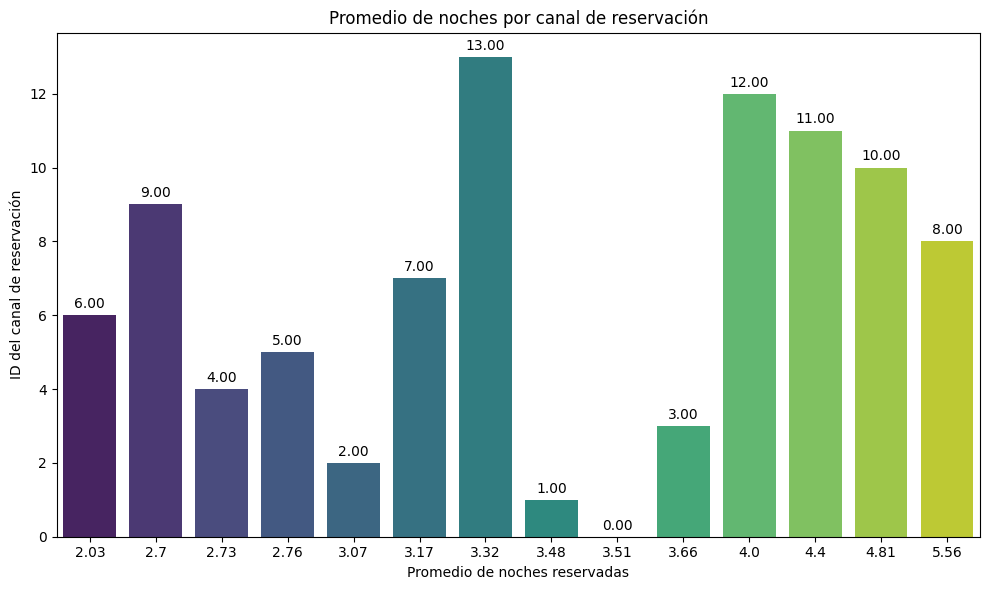

In [ ]:
# Calcular el promedio de noches por canal
promedio_noc_x_canal = df.groupby('ID_canal')['h_num_noc'].mean().reset_index()
promedio_noc_x_canal.columns = ['ID_canal', 'Promedio_num_noc']
promedio_noc_x_canal['Promedio_num_noc'] = promedio_noc_x_canal['Promedio_num_noc'].round(2)
promedio_noc_x_canal = promedio_noc_x_canal.sort_values(by='Promedio_num_noc', ascending=False)

# Mostrar tabla
print(promedio_noc_x_canal)

# Visualizar con gráfica de barras
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=promedio_noc_x_canal, x='Promedio_num_noc', y='ID_canal', palette='viridis')

# Agregar etiquetas con 2 decimales
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f', padding=3)

plt.xlabel('Promedio de noches reservadas')
plt.ylabel('ID del canal de reservación')
plt.title('Promedio de noches por canal de reservación')
plt.tight_layout()
plt.show()

### 👥 4. Segmento vs número de personas


In [ ]:
df_anova = df[['ID_Segmento_Comp', 'h_num_per']].dropna()
modelo = ols('h_num_per ~ C(ID_Segmento_Comp)', data=df_anova).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)

print(anova_resultado)

                           sum_sq        df            F  PR(>F)
C(ID_Segmento_Comp)  13021.870650      19.0  1009.136538     0.0
Residual             68975.810688  101561.0          NaN     NaN


#### Visualización

<ipython-input-40-2f780568f452>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ID_Segmento_Comp', y='h_num_per', palette='Set2', showfliers=False)


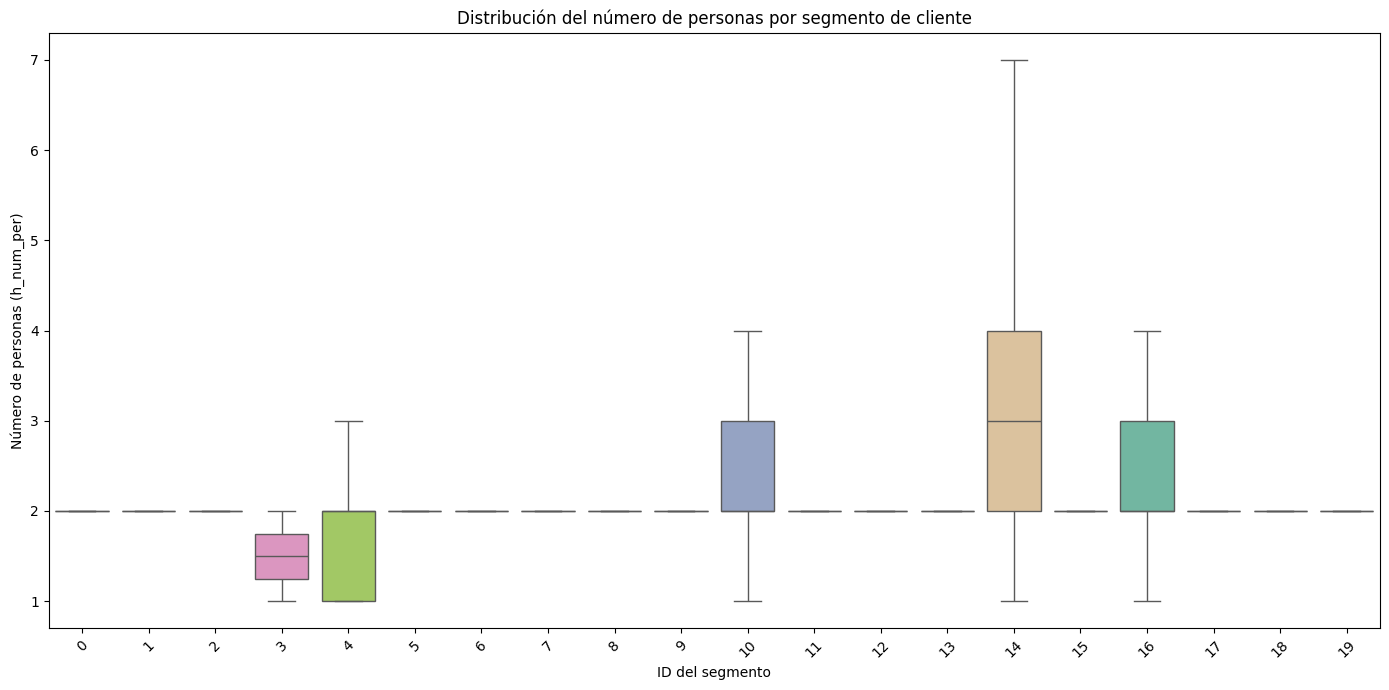

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='ID_Segmento_Comp', y='h_num_per', palette='Set2', showfliers=False)
plt.title('Distribución del número de personas por segmento de cliente')
plt.xlabel('ID del segmento')
plt.ylabel('Número de personas (h_num_per)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 🇲🇽 5. País vs tarifa total (o noches)


In [ ]:
df_anova = df[['ID_Pais_Origen', 'h_tfa_total']].dropna()
modelo = ols('h_tfa_total ~ C(ID_Pais_Origen)', data=df_anova).fit()
anova_resultado = sm.stats.anova_lm(modelo, typ=2)

print(anova_resultado)

                         sum_sq        df          F        PR(>F)
C(ID_Pais_Origen)  7.710123e+09       3.0  81.569146  1.056495e-52
Residual           3.200439e+12  101577.0        NaN           NaN


#### Visualización

<ipython-input-42-46a3ecc1dc8e>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='ID_Pais_Origen', y='h_tfa_total', palette='pastel', showfliers=False)


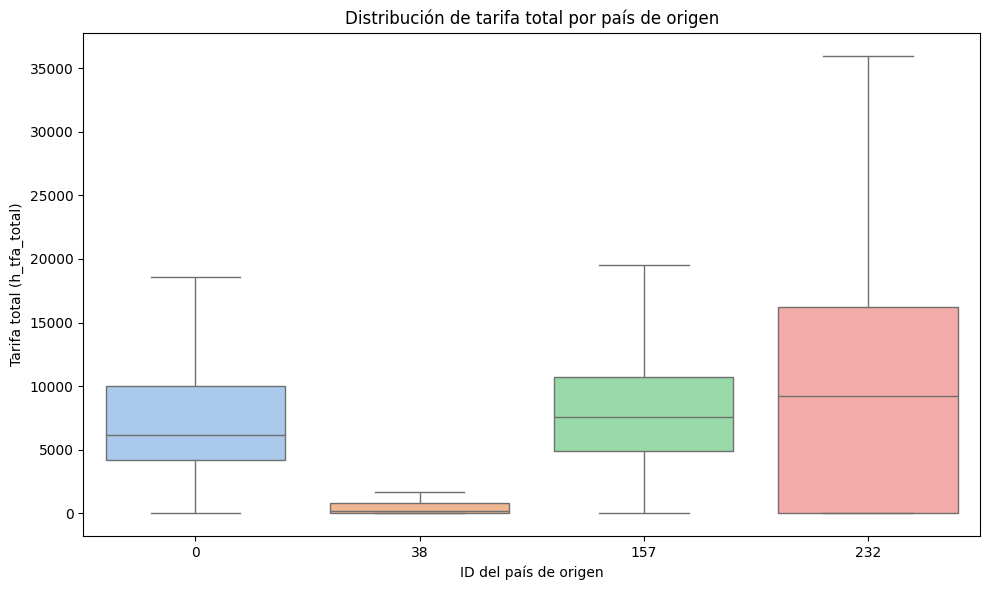

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ID_Pais_Origen', y='h_tfa_total', palette='pastel', showfliers=False)
plt.title('Distribución de tarifa total por país de origen')
plt.xlabel('ID del país de origen')
plt.ylabel('Tarifa total (h_tfa_total)')
plt.tight_layout()
plt.show()

Información del ID_Pais_Origen, sus valores y frecuencias/porcentajes

In [ ]:
# Calcular frecuencia y porcentaje
frecuencia_paises = df['ID_Pais_Origen'].value_counts().reset_index()
frecuencia_paises.columns = ['ID_Pais_Origen', 'Frecuencia']
frecuencia_paises['Porcentaje'] = (frecuencia_paises['Frecuencia'] / frecuencia_paises['Frecuencia'].sum()) * 100

# Mostrar los resultados ordenados
print(frecuencia_paises)

   ID_Pais_Origen  Frecuencia  Porcentaje
0             157      100845   99.275455
1             232         312    0.307144
2               0         310    0.305175
3              38         114    0.112226
